In [1]:
import fenics
import matplotlib.pyplot as plt
from fenics_interactive_impulse_response_plot import fenics_interactive_impulse_response_plot

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


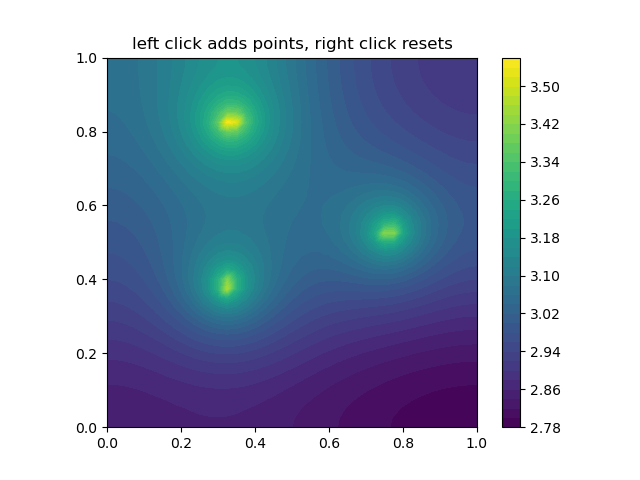

(<Figure size 640x480 with 2 Axes>, 7)

In [3]:
n = 40
mesh = fenics.UnitSquareMesh(n,n)
V = fenics.FunctionSpace(mesh, 'CG', 1)
u_trial = fenics.TrialFunction(V)
v_test = fenics.TestFunction(V)
a = fenics.inner(fenics.grad(u_trial), fenics.grad(v_test)) * fenics.dx + u_trial * v_test * fenics.dx
A_fenics = fenics.assemble(a)
x_fenics = fenics.Function(V)

solve_A_fenics = fenics.LUSolver(A_fenics)
def apply_invA(b_petsc):
    solve_A_fenics.solve(x_fenics.vector(), b_petsc)
    return x_fenics.vector()

fenics_interactive_impulse_response_plot(apply_invA, V)